### Жирнов Михаил группа BD-11

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import random

from scipy import stats

fig = plt.figure(figsize= (14,5))

<Figure size 1008x360 with 0 Axes>

In [2]:
df = pd.read_csv('data.csv', sep = ',')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Первичный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Оставляем только самое необходимое

In [4]:
#упрощаем дата-сет
cols = ['Nationality', 'Preferred Foot', 'Overall']
df = df[cols]
df.head()

,Nationality,Preferred Foot,Overall
0,Argentina,Left,94
1,Portugal,Right,94
2,Brazil,Right,92
3,Spain,Right,91
4,Belgium,Right,91


In [5]:
df.groupby(['Preferred Foot'])['Overall'].mean()

Preferred Foot
Left     66.801472
Right    66.083381
Name: Overall, dtype: float64

Вроде в среднем рейтинг игроков левшей лучше???(изучим вопрос далее)

In [6]:
df.groupby(['Preferred Foot'])['Overall'].std()

Preferred Foot
Left     6.557186
Right    7.010650
Name: Overall, dtype: float64

Дисперсии различны!!!(стандартное отклонение в квадрате)

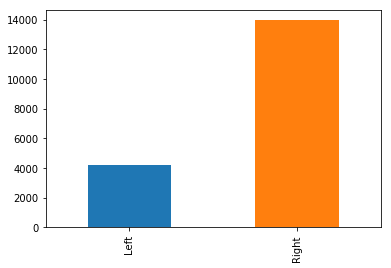

In [7]:
df['Preferred Foot'].value_counts().sort_index().plot.bar()

(array([1.000e+00, 2.000e+01, 3.200e+01, 3.600e+01, 1.030e+02, 1.250e+02,
        1.590e+02, 1.990e+02, 2.500e+02, 2.650e+02, 3.430e+02, 4.020e+02,
        4.440e+02, 5.250e+02, 6.490e+02, 7.110e+02, 8.780e+02, 1.002e+03,
        1.091e+03, 1.045e+03, 1.163e+03, 1.118e+03, 1.035e+03, 9.730e+02,
        8.890e+02, 7.830e+02, 7.530e+02, 6.080e+02, 5.370e+02, 4.970e+02,
        3.730e+02, 3.040e+02, 1.680e+02, 1.710e+02, 1.430e+02, 9.300e+01,
        9.400e+01, 7.000e+01, 4.500e+01, 3.300e+01, 2.200e+01, 1.300e+01,
        1.700e+01, 1.100e+01, 5.000e+00, 6.000e+00, 1.000e+00, 2.000e+00]),
 array([46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58.,
        59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71.,
        72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.,
        85., 86., 87., 88., 89., 90., 91., 92., 93., 94.]),
 <a list of 48 Patch objects>)

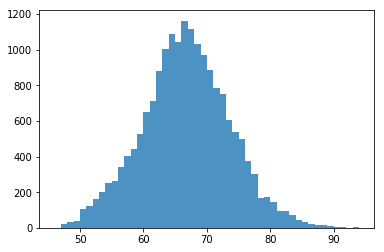

In [8]:
plt.hist(df['Overall'], 48, alpha=0.8)

Похоже на нормальное распределение...

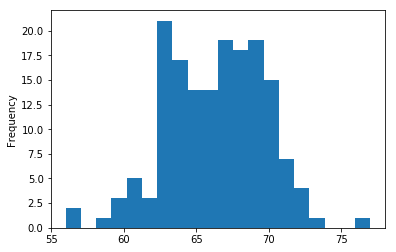

In [9]:
df_Natiolality = df.groupby(['Nationality'])['Overall'].mean()
df_Natiolality.plot.hist(bins=20)

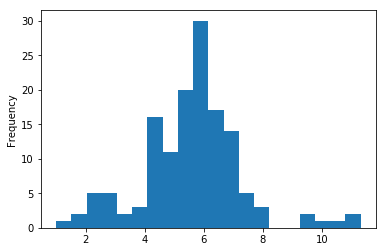

In [10]:
df_Natiolality = df.groupby(['Nationality'])['Overall'].std()
df_Natiolality.plot.hist(bins=20)

### Проверка распределения на нормальность

### Q-Q Plot

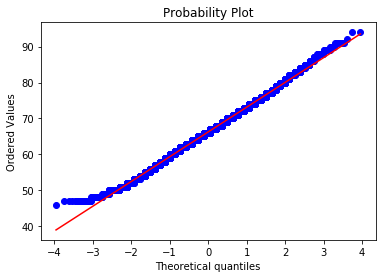

In [11]:
stats.probplot(df['Overall'], dist = "norm", plot = plt)
plt.show()

Из графика видно, что распределение схоже с нормальным(квантили), так как все точки попадают на прямую y=x (хвосты немного тяжелые)

### Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

p-value 0.11913612912477128


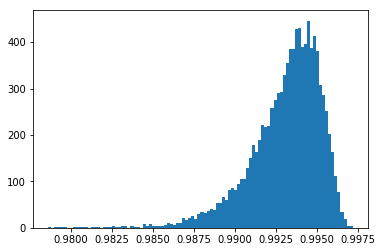

In [12]:
def check_norm(sz = 10):
    Sum_p = 0
    Wl = []
    
    for i in range(sz):
        sample = np.array(df['Overall'])     
        np.random.shuffle(sample)
        W, p = stats.shapiro(sample[:400])
        Sum_p += p  
        Wl.append(W)
    
    return Wl, Sum_p/sz

Wl, p_value = check_norm(sz = 10000)
print('p-value', p_value)

plt.hist(Wl,bins = 100)
plt.show()


p-value $>$ 0.05, поэтому гипотеза о нормальности принимается

**Примечание:** тест Шапиро-Уилка лучше на выборках не очень большого объема(явное ограничение в документации SciPy), 
            поэтому имеет смысл брать выборки из генеральной совокупности, и уже для них применять тест.

### Вывод:  
генеральная совокупность имеет **нормальное распределение** (следовательно можно использовать различные "сильные" критерии)

### Задача 1
Игровой рейтинг (поле Overall) "левшей" (поле Preferred Foot) больше рейтинга "правшей"?

In [13]:
#можем по желанию ограничить выборку
left_overall = df[df['Preferred Foot'] == 'Left']['Overall']
right_overall = df[df['Preferred Foot'] == 'Right']['Overall']

### Гипотезы
$H_0$ - средний игровой рейтинг "левшей" $=$ средний игровой рейтинг "правшей"(нулевая гипотеза)

$H_1$ - средний игровой рейтинг "левшей" $>$ средний игровой рейтинг "правшей"(альтернативная гипотеза)

### 2.2 Критерий Стьюдента(для несвязанных выборок)

Критерий Стьюдента применим лишь тогда, когда данные распределенны **нормально**(так и есть) 

(array([  77.,  332.,  593.,  971., 1478., 3019., 2463., 2014., 1421.,
         893.,  449.,  156.,   51.,   23.,    8.]),
 array([46. , 49.2, 52.4, 55.6, 58.8, 62. , 65.2, 68.4, 71.6, 74.8, 78. ,
        81.2, 84.4, 87.6, 90.8, 94. ]),
 <a list of 15 Patch objects>)

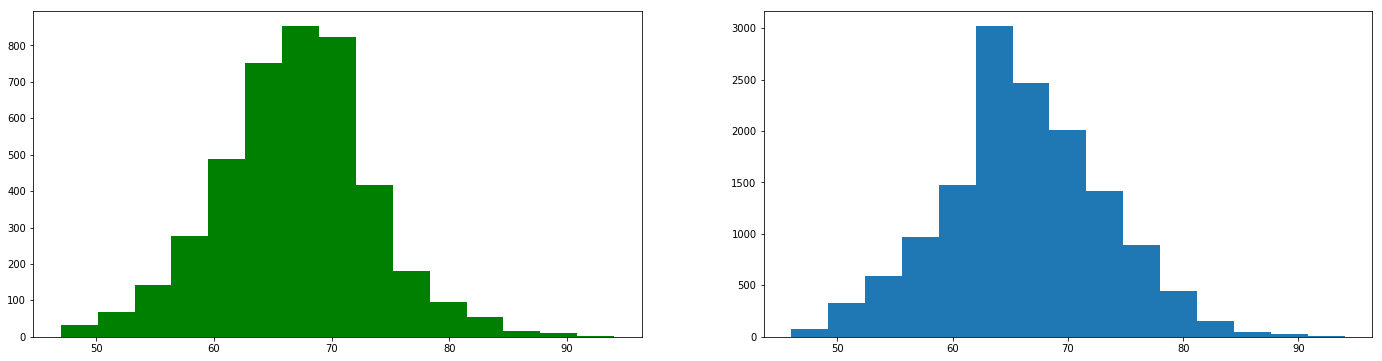

In [14]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(left_overall, 15, color='green')

ax2 = plt.subplot(122)
plt.hist(right_overall, 15)

### Проверка на равенство дисперсий

In [15]:
#Можно заметить, что дисперсия совпадает, при помощи критерия Левене
print(left_overall.std(), right_overall.std())

(W,p) = stats.levene(left_overall, right_overall)
print(p)

6.5571855179816305 7.010649734817939
2.271381808572723e-08


Из критерия видно, что дисперсии **различны**, следовательно:

Используем t-критерий **для несвязанных выборок с различными дисперсиями**

Cам t-критерий:

**t** = $ \frac{\text{Разность выборочных средних}} {\text{Стандартная ошибка разности выборочных средних} } = \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}}  = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ S_{\overline{X_1}}^2 +  S_{\overline{X_2}}^2 } } = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ \frac{S_1^2} {n_1} +  \frac{S_2^2} {n_2} } } $

Мы принимаем уровень значимости равный 5%(справа критическое значение соотв. 0.95). 

Исходя из условий задачи мы рассматриваем **правосторонний** тест

Рассчитанное значение t-статистики:

In [16]:
t_obs = (left_overall.mean() - right_overall.mean()) / np.sqrt( (left_overall.std())**2 / len(left_overall) \
                                                     + (right_overall.std())**2 / len(right_overall) )
t_obs

6.12739948118997

Теоретическое значение t-статистики**(правосторонний тест)**:

Так как дисперсии выборок различны, то $df$ - число степеней совободы определяется:

##  $df = \frac{{(\frac{S_1^2} {n_1} +  \frac{S_2^2} {n_2})}^2} {\frac{(\frac{S_1^2} {n_1})^2}{n_1-1} +  \frac{(\frac{S_2^2} {n_2})^2}{n_2-1}}$ 

In [17]:
_df = ((left_overall.std())**2 / len(left_overall) + (right_overall.std())**2 / len(right_overall))**2 \
        /( ((left_overall.std())**2 / len(left_overall))**2/(len(left_overall)-1) + \
           ((right_overall.std())**2 / len(right_overall))**2/(len(right_overall)-1) )

stats.t.ppf(0.95, _df)#квантиль порядка 1-alpha

1.6450608877199313

Если посчитать p-value(сравнить с уровнем значимости):

In [18]:
#функция считающая вероятноcть
print('p-value =', stats.t.sf(t_obs, _df))

p-value = 4.696677618481202e-10


Давайте дополнительно найдем Теоретическое значение t-статистики **на левом конце**:

In [19]:
#число степеней свободы тоже
stats.t.ppf(0.05, _df)#квантиль порядка alpha

-1.645060887719932

Рассчитанное значение t-статистики $t_{obs}$ не меняется

$t_{obs}$ > теоретическое значения t-статистики(на левом конце) **и** 

$t_{obs}$ > теоретическое значения t-статистики(на правом конце)

$=>$  $t_{obs}$ выходит из области принятия**(интервала)** гипотезы $H_0$ **справа**  $=>$

$=>$ значит гипотезу  $H_0$ **отвергаем в пользу** $H_1$ - средний игровой рейтинг "левшей" $>$ средний игровой рейтинг "правшей"(альтернативная гипотеза)   

Ради интереса можем применить **критерий Манна-Уитни**

Он работает и для произвольных выборок(не обязательно нормально распределенных)

In [20]:
#применяем критерий Манна-Уитни,
u, p_value = stats.mannwhitneyu(left_overall, right_overall)
print(u, "two-sample wilcoxon-test", p_value)

27693265.5 two-sample wilcoxon-test 9.468043989128382e-09


Ну в nринципе как и ожидалось, средние различны

### Вывод:
Итого: отвергаем $H_0$ в пользу $H_1$(рассчетная t-статистика расположена правее области принятия)


Игровой рейтинг (поле Overall) "левшей" (поле Preferred Foot) **больше** рейтинга "правшей"

### Задача 2

Проверить гипотезу: Средний игровой рейтинг игроков из Аргентины, Англии и Германии (поле Nationality) одинаков.

### Гипотезы:

$H_0$ - Средний игровой рейтинг игроков из Аргентины, Англии и Германии (поле Nationality) одинаков

$H_1$ - Средний игровой рейтинг игроков из Аргентины, Англии и Германии (поле Nationality) различен

Тут происходит множественное сравнение $=>$ используем **ANOVA** анализ

Анализ применим только для **нормально распределенных совокупностей**!!!(Проверяли выше)

In [21]:
Arg_overall = np.array(df[df['Nationality'] == 'Argentina']['Overall'])
Engl_overall = np.array(df[df['Nationality'] == 'England']['Overall'])
Germ_overall = np.array(df[df['Nationality'] == 'Germany']['Overall'])

np.random.shuffle(Arg_overall)
np.random.shuffle(Engl_overall)
np.random.shuffle(Germ_overall)

In [22]:
sample_groups = [Arg_overall, Engl_overall, Germ_overall]

[68.57203842049093, 63.42960288808664, 66.08681135225376]
[0 1 2]
[6.163148944845217, 6.783273099749994, 6.636204364198736]
66.02948422027711


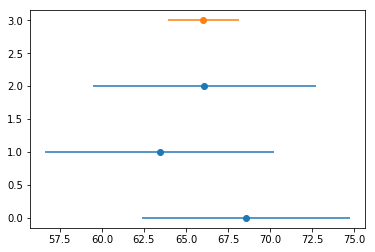

In [23]:
#Средние каждой выборки, их стандартное отклонение, а также стандартное отклонение средних и среднее средних
x = [sample_groups[i].mean() for i in range(len(sample_groups))]
print(x)
y = np.arange(len(sample_groups))
print(y)
e = [sample_groups[i].std() for i in range(len(sample_groups))]
print(e)
plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')

plt.errorbar( np.mean(x), len(y) ,xerr =  np.std(x), linestyle='None', marker='o')
print(np.mean(x))
plt.show()

Применимость **ANOVA**(дисперсии должны совпадать)

In [24]:
#Можно заметить, что дисперсия совпадает, при помощи критерия Левене
(W,p) = stats.levene(sample_groups[0], sample_groups[1], sample_groups[2])
print('p-value =',p)

p-value = 0.07640649585695944


p-value $>$ 0.05, поэтому гипотеза о равенстве дисперсий **принимается**

 Нулевая гипотеза $H_0$ ANOVA предполагает, что мат. ожидания совпадают.

**F** = $ \frac{\text{Дисперсия совокупности,оцененная по выборочным средним}} {\text{Дисперсия совокупности, оцененная по выборочным дисперсиям}} =  \frac{Sмеж.^2} {Sвнутр.^2} = SST = \frac{\frac{SSB} {m-1}} {\frac{SSW} {N - m}} $

$ SST - \text{общая изменчивость}, $ 
$ SSB - \text{межгрупповая изменчивость}, $ 
$ SSW - \text{внутригрупповая изменчивость}$ 

In [25]:
F, p = stats.f_oneway(sample_groups[0],sample_groups[1],sample_groups[2])
print(F, p)

188.4577613116321 9.304102531320665e-79


Мы можем **отвергнуть** гипотезу $H_0$ в пользу $H_1$, т.к. p-value < 0.05

Но тут возникает естественный вопрос: для каких пар объектов гипотеза отклоняется???

При этом нужно провести серию сравнений, по одному для каждой пары $=>$ появляется **эффект множественных сравнений**

Надо скорректировать вероятность p при помощи метода **Бонферрони**:

In [31]:
#Попарно применили критерий Стьюдента
t_val1, pVal_t1 = stats.ttest_ind(sample_groups[0],sample_groups[1])#Аргентины, Англии
t_val2, pVal_t2 = stats.ttest_ind(sample_groups[0],sample_groups[2])#Аргентины, Германии
t_val3, pVal_t3 = stats.ttest_ind(sample_groups[1],sample_groups[2])#Англии, Германии

print(pVal_t1, pVal_t2, pVal_t3)

1.1654484192722837e-76 1.731315688159279e-18 5.2486111739015295e-25


Если мы хотим, чтобы групповая вероятность ошибки при этом не превышала определенный уровень значимости α (например, 0.05), то, согласно методу Бонферрони, мы должны сравнить каждое из полученных Р-значений не с α, а с α/k, где k - число проверяемых гипотез.

In [32]:
alpha = 0.05/3
alpha

0.016666666666666666

In [33]:
if pVal_t1 < alpha and pVal_t2 < alpha and pVal_t3 < alpha:
    print("Они все имеют разный средний рейтинг!")
else:
    print("Есть одинаковые")

Они все имеют разный средний рейтинг!


Попробуем использовать вместо Стюдента **критерий Манна-Уитни**:

In [34]:
t_val1, pVal_t1 = stats.mannwhitneyu(sample_groups[0],sample_groups[1])#Аргентины, Англии
t_val2, pVal_t2 = stats.mannwhitneyu(sample_groups[0],sample_groups[2])#Аргентины, Германии
t_val3, pVal_t3 = stats.mannwhitneyu(sample_groups[1],sample_groups[2])#Англии, Германии
print(pVal_t1, pVal_t2, pVal_t3)

2.1695329191349672e-75 5.408065915956872e-22 5.1983501658344504e-24


In [35]:
if pVal_t1 < alpha and pVal_t2 < alpha and pVal_t3 < alpha:
    print("Они все имеют разный средний рейтинг!")
else:
    print("Есть одинаковые")

Они все имеют разный средний рейтинг!


Тот же результат!

### Вывод:
Итого: отвергаем $H_0$ в пользу $H_1$ (Средний игровой рейтинг игроков из Аргентины, Англии и Германии (поле Nationality) **различен**), 

причём гипотеза совпадения М.О.  парных выборок совокупности **так же** была **отвергнута** (для любой пары выборок)